## Загрузка необходимых библиотек

In [3]:
# Импорт стандарнтых библиотек
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import torch
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
%matplotlib inline

# Импорт дополнительных библиотек
import sys
sys.path.append('../../')

import TSLib.models.utils as utils

## Определение констант

In [5]:
seq_lenght = 288 # Длинна временной последовательнсоти
batch_size=64 # размер батча
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # Устройство вычисления
device

device(type='cuda')

## Данные
Загрузка датасета без аномалий в датафрейм pandas

In [6]:
df = pd.read_csv('../../data/NAB/artificialNoAnomaly/art_daily_small_noise.csv', sep=',', index_col='timestamp', parse_dates=True)

Нормализация датафрейма

In [7]:
scaler = MinMaxScaler()
scaler.fit(df)
norm_df = scaler.transform(df)

Создание даталоадера тренировочных и тестовых данных

In [8]:
X, y = utils.create_sequences(norm_df, seq_lenght)
X_train, X_test, y_train, y_test = utils.train_test_split(X, y, test_size=0.2)
train_loader = utils.create_loader(X_train, y_train, batch_size, shuffle=True)
test_loader = utils.create_loader(X_test, y_test, batch_size, shuffle=False)

## Модель
Загрузка модели LSTM

In [9]:
from TSLib.models.lstm import LSTM

Создание модели - экземпляра класса LSTM

In [10]:
input_size = X_train.shape[2] # Размер входных данных
hidden_size = 100 # Размер входных данных
num_class = X_train.shape[2] # Размер входных данных
num_layers = 2 # Размер входных данных

model = LSTM(input_size, hidden_size, num_class, num_layers, device).to(device) # Создание модели
model

LSTM(
  (lstm): LSTM(1, 100, num_layers=2, batch_first=True)
  (linear): Linear(in_features=100, out_features=1, bias=True)
  (activat): ReLU()
)

Обучение

In [11]:
num_epochs = 20
loss_fn = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
train_hist, test_hist = utils.train(num_epochs, model, train_loader, test_loader, device, loss_fn, optimizer)

Epoch [1/20] - Training Loss: 0.0892 - Test Loss: 0.0238
Epoch [2/20] - Training Loss: 0.0177 - Test Loss: 0.0133
Epoch [3/20] - Training Loss: 0.0138 - Test Loss: 0.0127
Epoch [4/20] - Training Loss: 0.0123 - Test Loss: 0.0107
Epoch [5/20] - Training Loss: 0.0110 - Test Loss: 0.0124
Epoch [6/20] - Training Loss: 0.0111 - Test Loss: 0.0095
Epoch [7/20] - Training Loss: 0.0098 - Test Loss: 0.0103
Epoch [8/20] - Training Loss: 0.0091 - Test Loss: 0.0083
Epoch [9/20] - Training Loss: 0.0088 - Test Loss: 0.0081
Epoch [10/20] - Training Loss: 0.0082 - Test Loss: 0.0077
Epoch [11/20] - Training Loss: 0.0076 - Test Loss: 0.0072
Epoch [12/20] - Training Loss: 0.0071 - Test Loss: 0.0063
Epoch [13/20] - Training Loss: 0.0069 - Test Loss: 0.0065
Epoch [14/20] - Training Loss: 0.0067 - Test Loss: 0.0059
Epoch [15/20] - Training Loss: 0.0066 - Test Loss: 0.0057
Epoch [16/20] - Training Loss: 0.0066 - Test Loss: 0.0057
Epoch [17/20] - Training Loss: 0.0063 - Test Loss: 0.0059
Epoch [18/20] - Trainin

MSE на обучающей и тестовой выборке

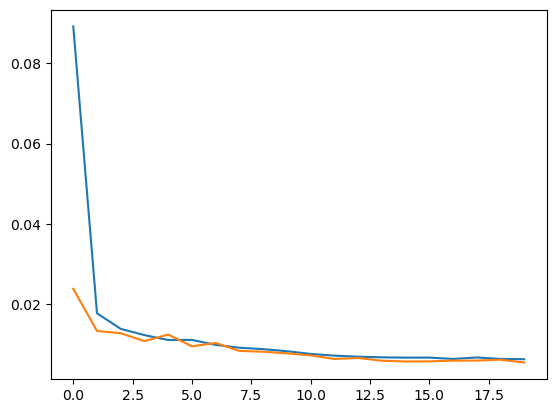

In [12]:
plt.plot(train_hist)
plt.plot(test_hist)
plt.show()

Сохранение обученной модели

In [13]:
torch.save(model, '../../TSLib/models/trained_models/LSTM_NAB.model')